In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
client_df=pd.read_csv("C://Users//HP//Downloads//client_data.csv")
price_df=pd.read_csv("C://Users//HP//Downloads//price_data.csv")

descriptive statistics

In [3]:
client_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [4]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


visualisations

In [5]:
churn=client_df[["churn","id"]]
churn_2=churn.groupby("churn").count()

churn_2

,id
churn,
0,13187
1,1419


In [6]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

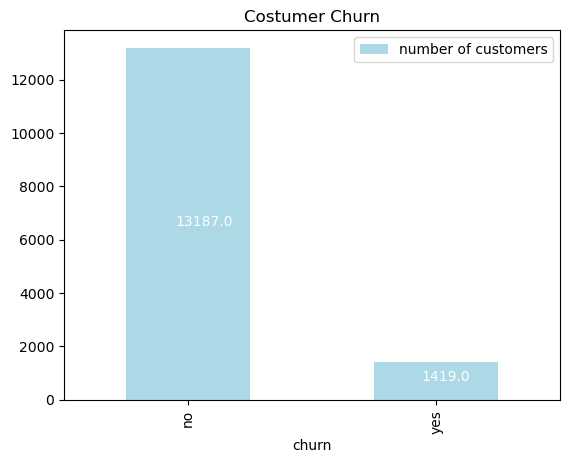

In [7]:
figure,ax=plt.figsize=(10,8)
ax=churn_2.plot(kind="bar",stacked=True,color="lightblue")
plt.xticks([0,1],["no","yes"])
plt.title("Costumer Churn")


annotate_stacked_bars(ax, textsize=10)
    
plt.legend(["number of customers"], loc="upper right")
plt.show()

In [8]:
churn_percentage=(churn_2/churn_2.sum())*100
churn_percentage

,id
churn,
0,90.284814
1,9.715186


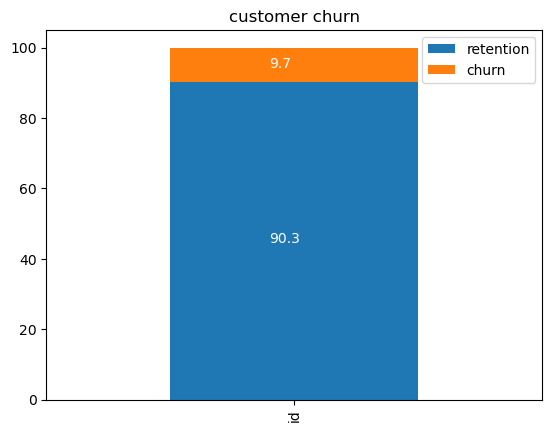

In [9]:
fig,ax1=plt.figsize=(5,5)
ax1=churn_percentage.transpose().plot(kind="bar",stacked=True,title="customer churn")

annotate_stacked_bars(ax1, textsize=10)
    
plt.legend(["retention","churn"], loc="upper right") 

plt.show()

sales channels

In [10]:
channels=client_df[["id","channel_sales","churn"]]
channels_1=channels.groupby([channels["channel_sales"],channels["churn"]]).count().unstack(level=1).fillna(0)
channels_1

id       
churn                                  0      1
channel_sales                                  
MISSING                           3442.0  283.0
epumfxlbckeskwekxbiuasklxalciiuu     3.0    0.0
ewpakwlliwisiwduibdlfmalxowmwpci   818.0   75.0
fixdbufsefwooaasfcxdxadsiekoceaa     2.0    0.0
foosdfpfkusacimwkcsosbicdxkicaua  5934.0  820.0
lmkebamcaaclubfxadlmueccxoimlema  1740.0  103.0
sddiedcslfslkckwlfkdpoeeailfpeds    11.0    0.0
usilxuppasemubllopkaafesmlibmsdf  1237.0  138.0

In [11]:
channel_perc=channels_1.div(channels_1.sum(axis=1),axis=0)*100
channel_perc

id           
churn                                      0          1
channel_sales                                          
MISSING                            92.402685   7.597315
epumfxlbckeskwekxbiuasklxalciiuu  100.000000   0.000000
ewpakwlliwisiwduibdlfmalxowmwpci   91.601344   8.398656
fixdbufsefwooaasfcxdxadsiekoceaa  100.000000   0.000000
foosdfpfkusacimwkcsosbicdxkicaua   87.859046  12.140954
lmkebamcaaclubfxadlmueccxoimlema   94.411286   5.588714
sddiedcslfslkckwlfkdpoeeailfpeds  100.000000   0.000000
usilxuppasemubllopkaafesmlibmsdf   89.963636  10.036364

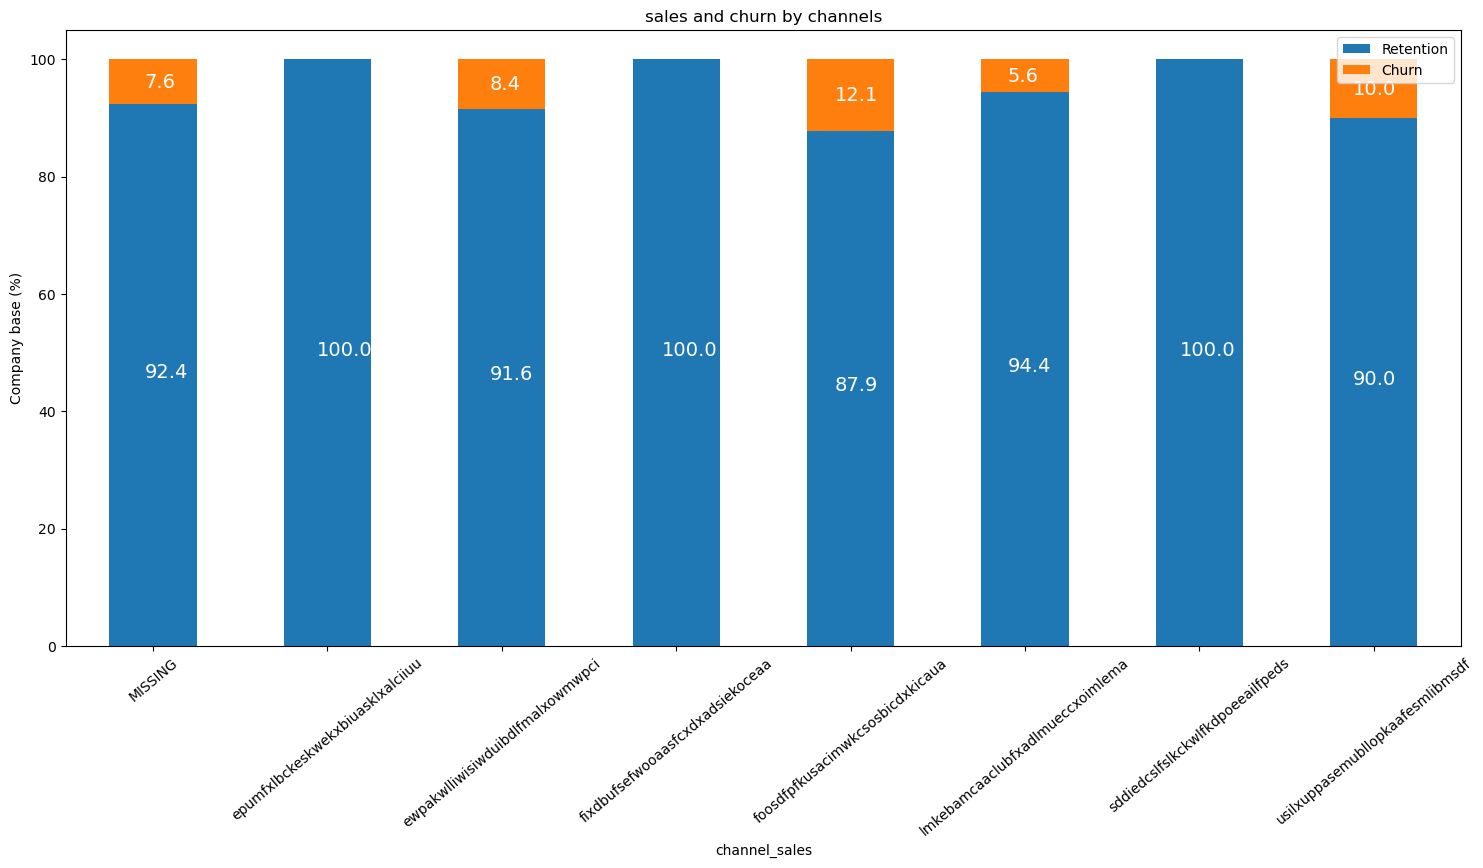

In [12]:
ax=plot_stacked_bars(channel_perc,"sales and churn by channels", size_=(18,8),rot_=40,legend_="upper right")

In [13]:
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

consumption data

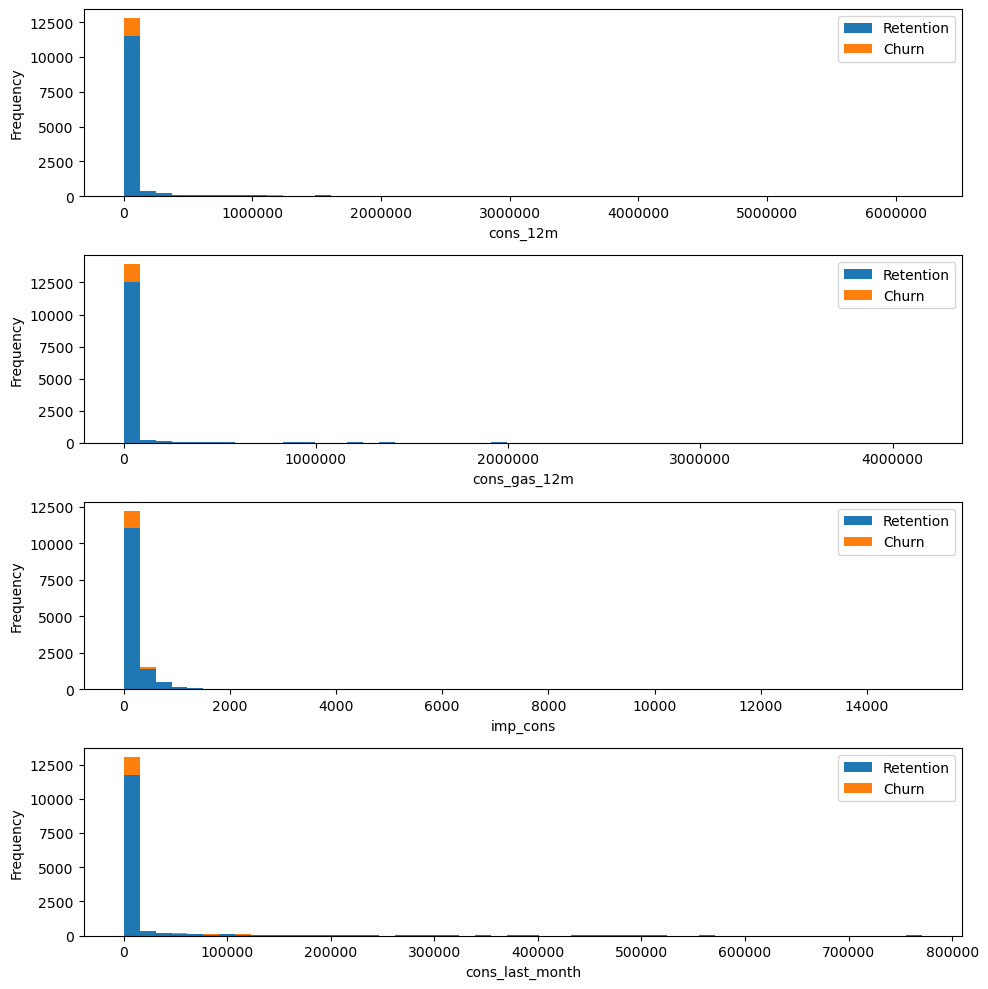

In [14]:
cons_data=client_df[["id","cons_12m","cons_gas_12m","imp_cons","cons_last_month","churn"]]

fig,ax=plt.subplots(4,figsize=(10,10))

plot_distribution(cons_data,"cons_12m",ax=ax[0])
plot_distribution(cons_data,"cons_gas_12m",ax=ax[1])
plot_distribution(cons_data,"imp_cons",ax=ax[2])
plot_distribution(cons_data,"cons_last_month",ax=ax[3])

plt.tight_layout()

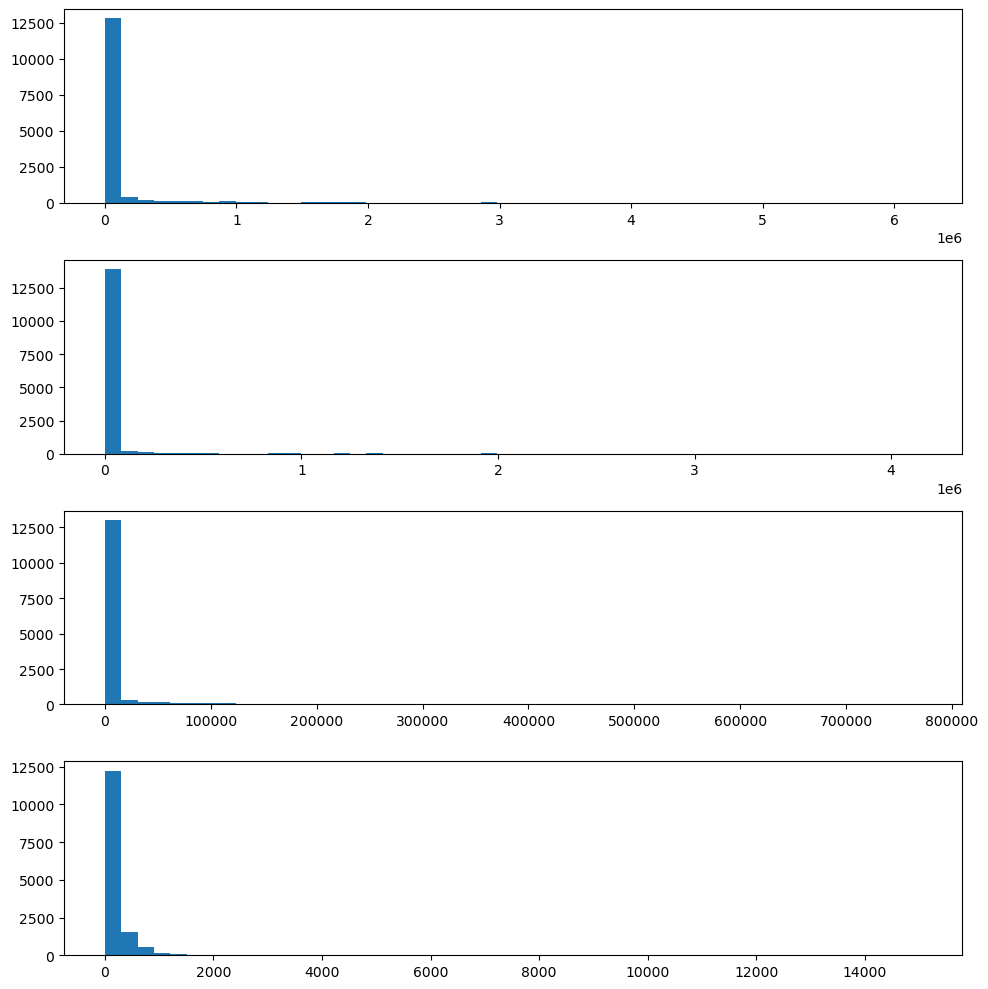

In [15]:
fig,ax=plt.subplots(4,figsize=(10,10))
ax[0].hist(cons_data["cons_12m"],bins=50)
ax[1].hist(cons_data["cons_gas_12m"],bins=50)
ax[2].hist(cons_data["cons_last_month"],bins=50)
ax[3].hist(cons_data["imp_cons"],bins=50)

plt.tight_layout()

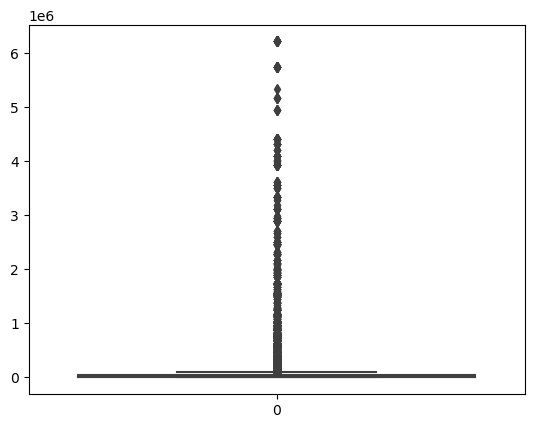

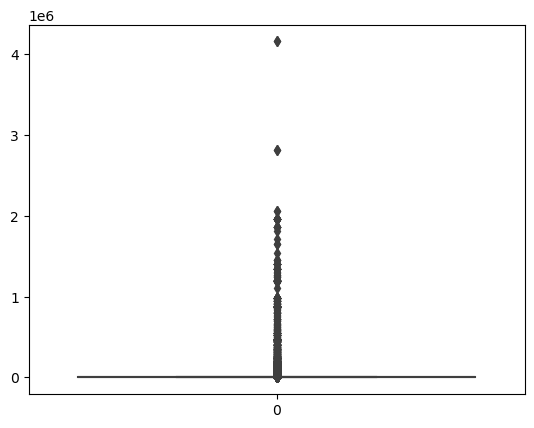

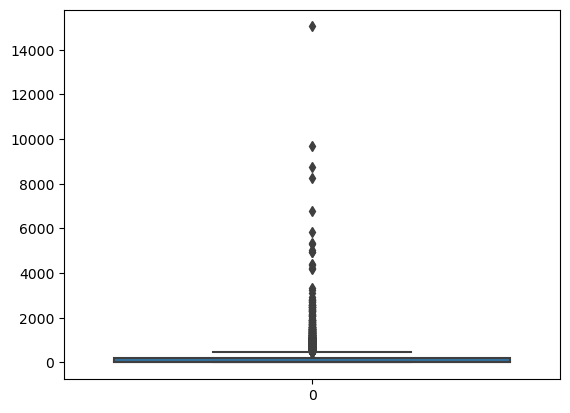

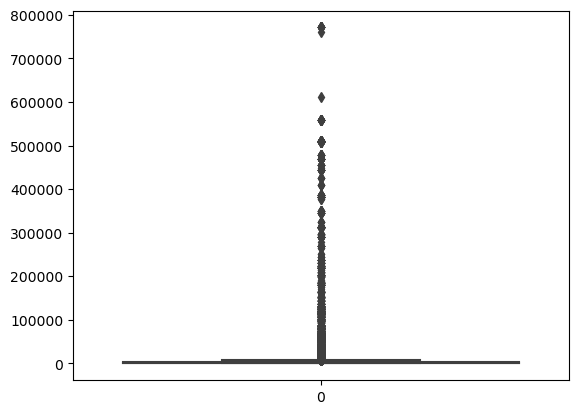

In [16]:
for col in cons_data:
    if cons_data[col].dtype!=object and col!="churn":
        sns.boxplot(cons_data[col])
        plt.show()


In [17]:
forecast_data=client_df[["id","forecast_cons_12m","forecast_meter_rent_12m","forecast_cons_year","forecast_discount_energy","forecast_price_energy_off_peak","forecast_price_energy_peak","forecast_price_pow_off_peak","churn"]]

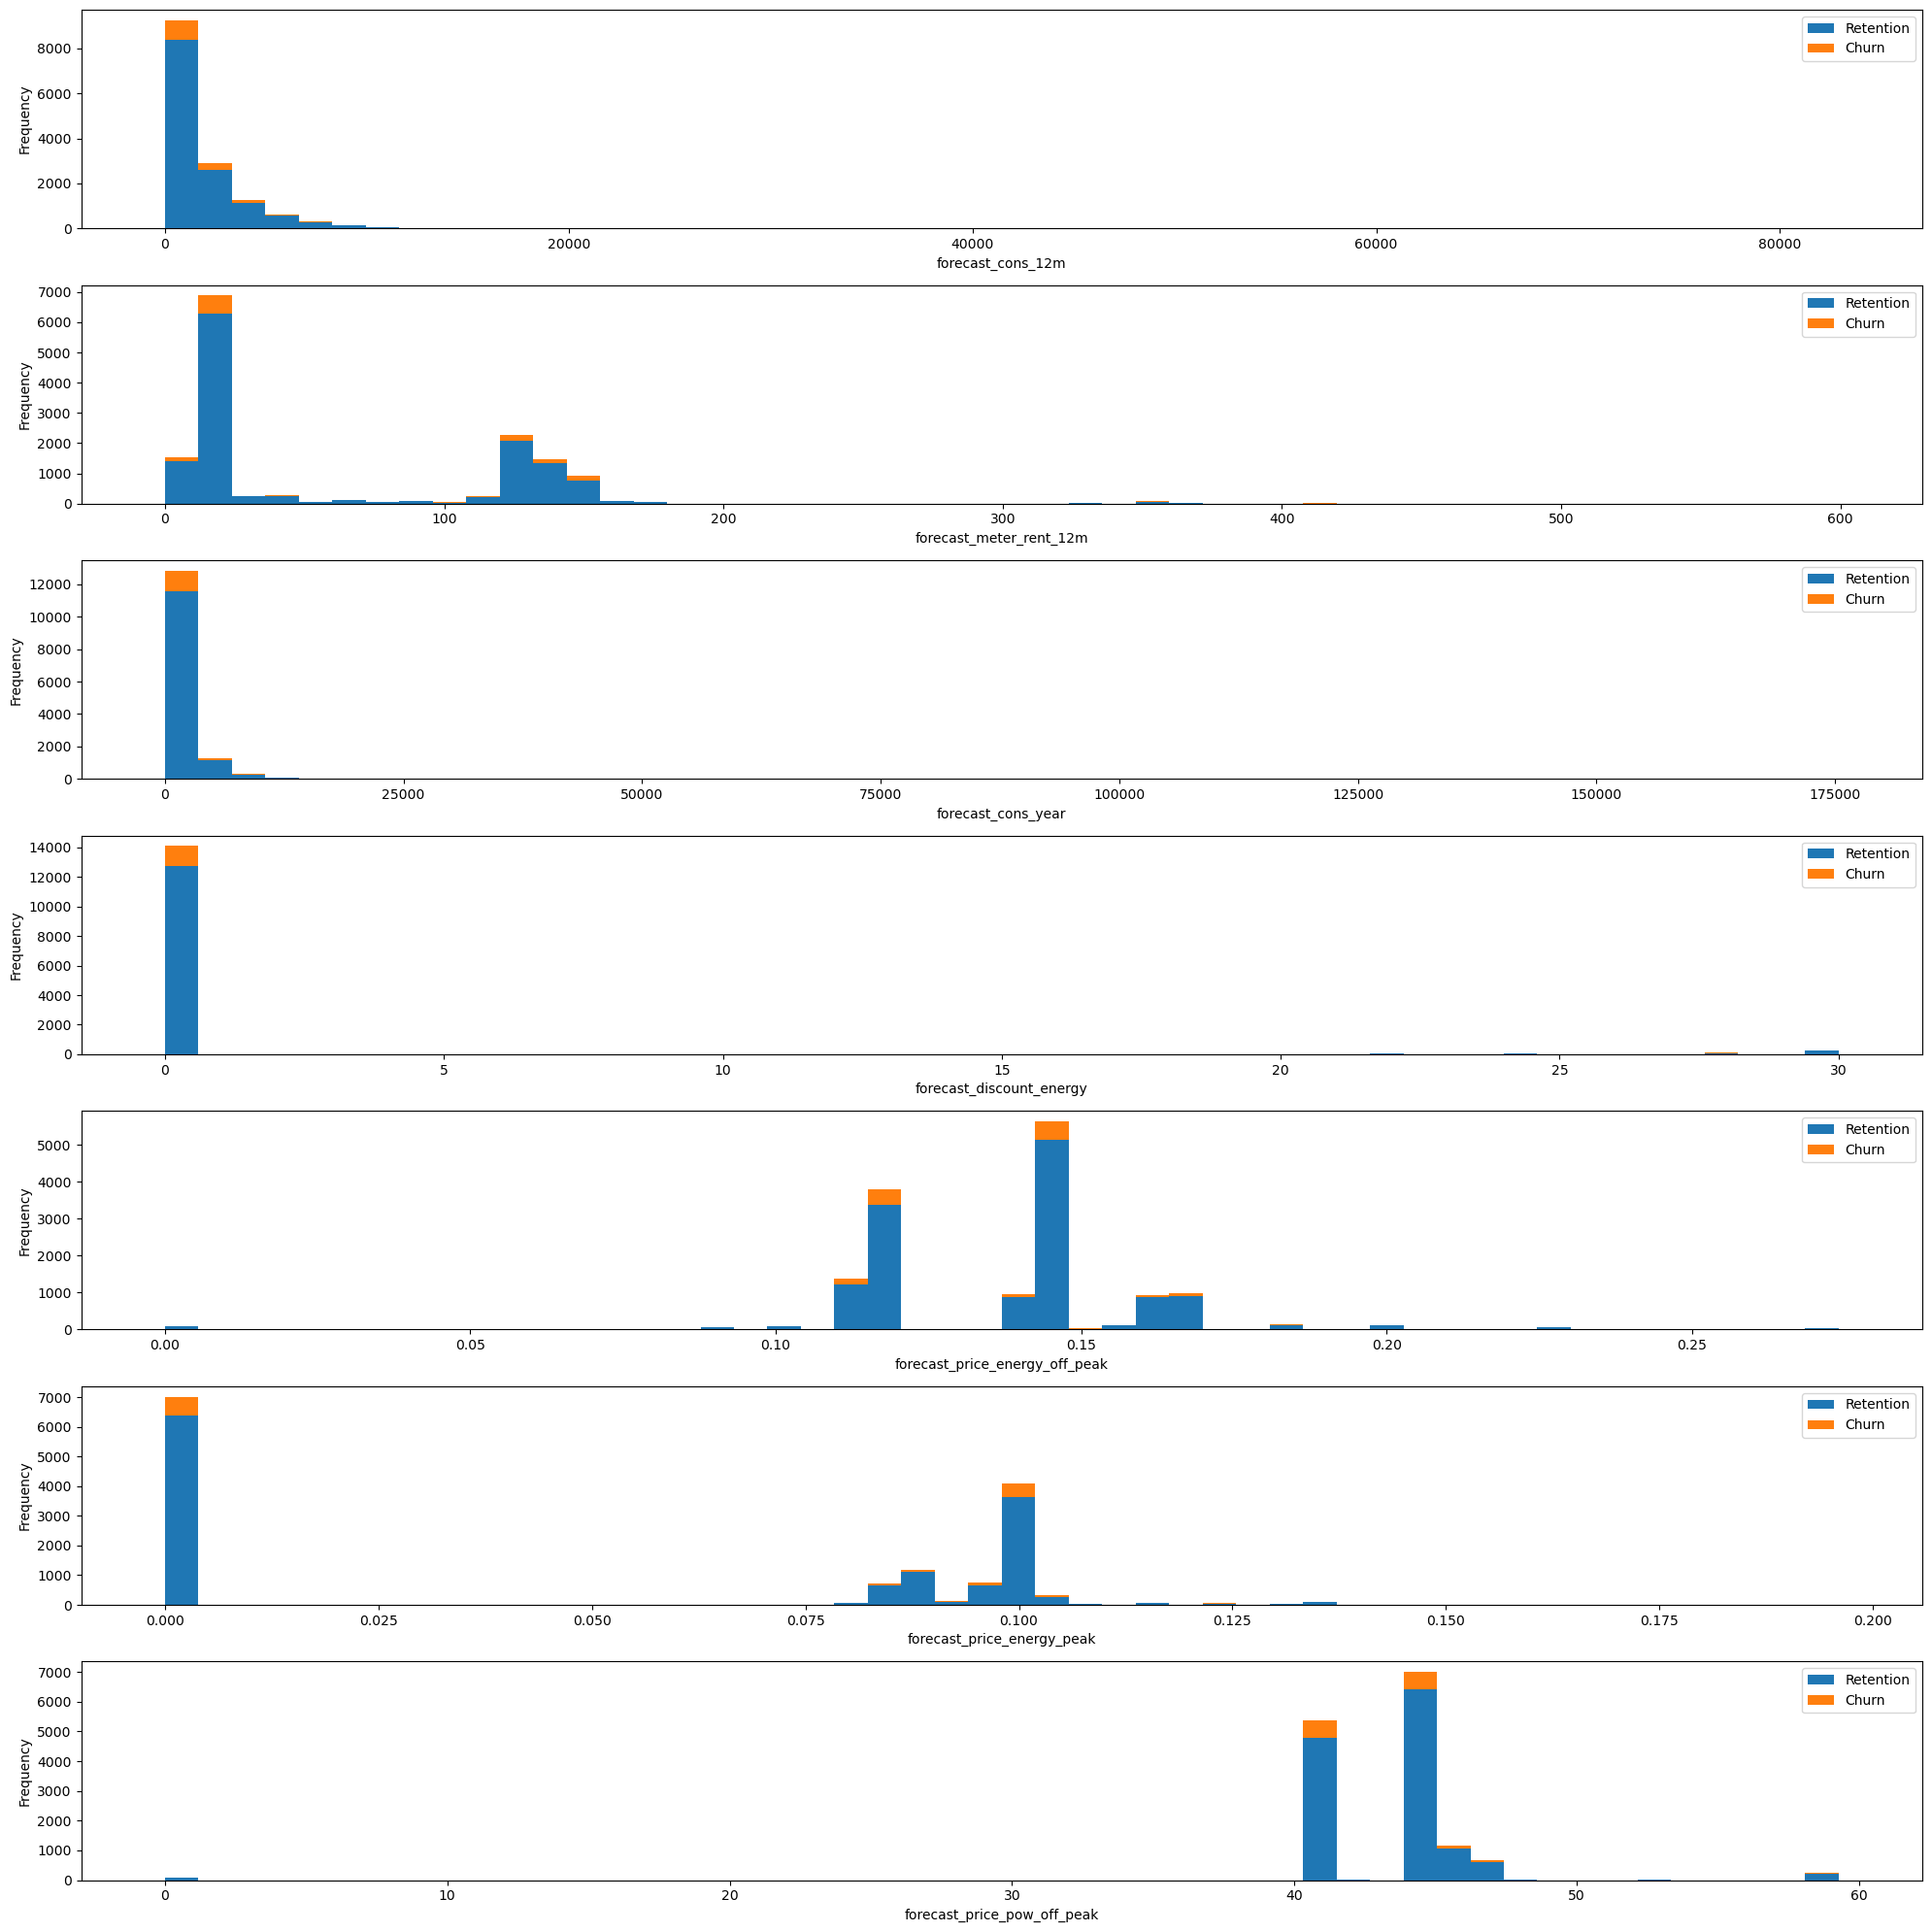

In [18]:
fig,axes=plt.subplots(7,1,figsize=(20,20))
                      
plot_distribution(forecast_data,"forecast_cons_12m",ax=axes[0],bins_=50)
plot_distribution(forecast_data,"forecast_meter_rent_12m",ax=axes[1],bins_=50)
plot_distribution(forecast_data,"forecast_cons_year",ax=axes[2],bins_=50)
plot_distribution(forecast_data,"forecast_discount_energy",ax=axes[3],bins_=50)                
plot_distribution(forecast_data,"forecast_price_energy_off_peak",ax=axes[4],bins_=50)
plot_distribution(forecast_data,"forecast_price_energy_peak",ax=axes[5],bins_=50)                
plot_distribution(forecast_data,"forecast_price_pow_off_peak",ax=axes[6],bins_=50)

plt.tight_layout()                      
plt.show()
    


contract type

In [19]:
contract_data=client_df[["id","has_gas","churn"]]
contract_1=contract_data.groupby([contract_data["has_gas"],contract_data["churn"]]).count().unstack(level=1)

contract_2=contract_1.div(contract_1.sum(axis=1),axis=0)*100

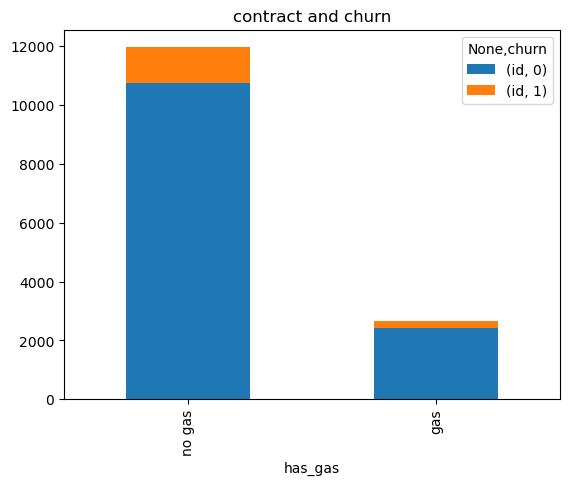

In [20]:
contract_1.plot(kind="bar",stacked=True,title="contract and churn")

plt.xticks([0,1],["no gas","gas"])
plt.show()

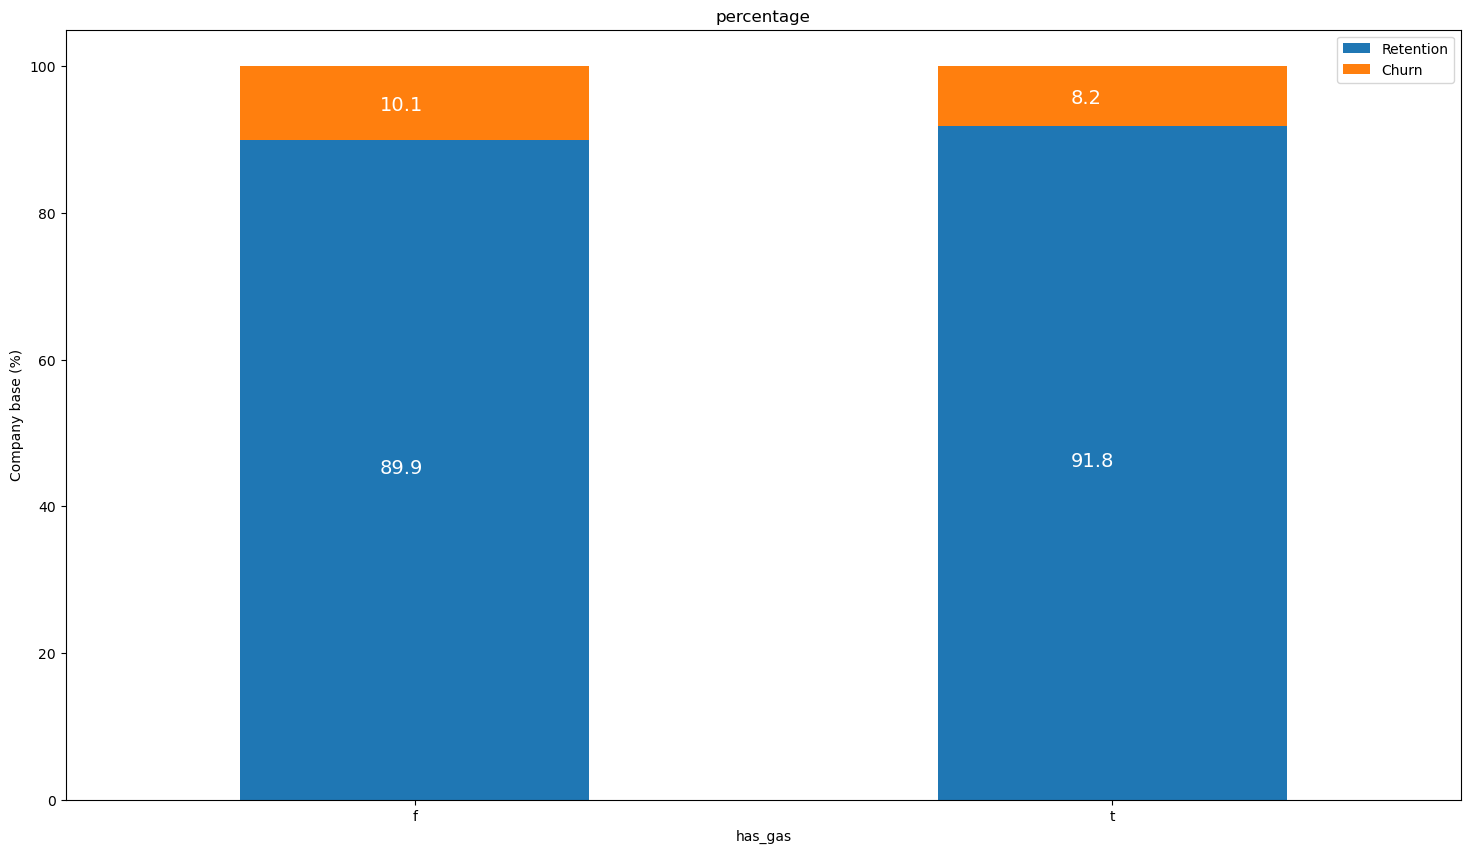

In [21]:
fig=figsize=(5,3)
plot_stacked_bars(contract_2,"percentage")


In [22]:
client_df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

In [23]:
margin_data=client_df[["margin_gross_pow_ele","margin_net_pow_ele","net_margin","nb_prod_act","churn"]]

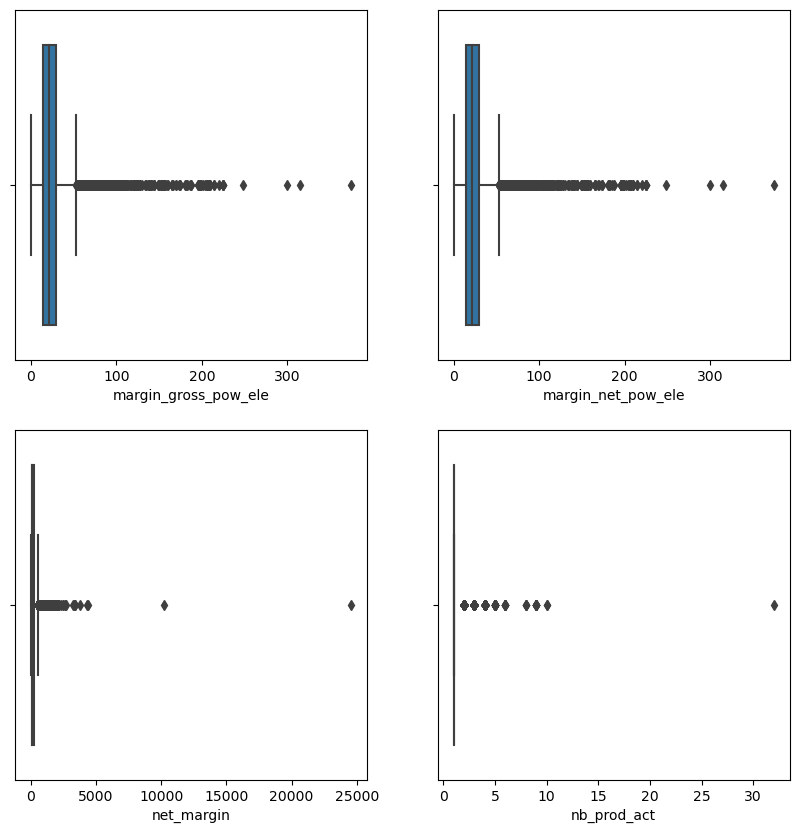

In [24]:
fig,axes=plt.subplots(2,2,figsize=(10,10))

sns.boxplot(x="margin_gross_pow_ele",data=margin_data,ax=axes[0, 0])
sns.boxplot(x="margin_net_pow_ele",data=margin_data,ax=axes[0, 1])
sns.boxplot(x="net_margin",data=margin_data,ax=axes[1, 0])
sns.boxplot(x="nb_prod_act",data=margin_data,ax=axes[1, 1])

plt.show()

subscription

In [25]:
subscription=client_df[["id","pow_max","churn"]]
subscription

,id,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,13.856,0
3,bba03439a292a1e166f80264c16191cb,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,19.800,0
...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,15.000,0
14602,d0a6f71671571ed83b2645d23af6de00,6.000,1
14603,10e6828ddd62cbcf687cb74928c4c2d2,15.935,1
14604,1cf20fd6206d7678d5bcafd28c53b4db,11.000,0


In [26]:
subscription_1=subscription.groupby("churn")
subs_1=subscription_1.get_group(["churn"]==1)
subs_1

,id,pow_max,churn
1,d29c2c54acc38ff3c0614d0a653813dd,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,13.856,0
3,bba03439a292a1e166f80264c16191cb,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,19.800,0
7,01495c955be7ec5e7f3203406785aae0,26.400,0
...,...,...,...
14599,46362cb1ad2fcdad347a6fa1bc1e5d4b,13.856,0
14600,c49217f16a06263e5381eaba94a67a8b,26.400,0
14601,18463073fb097fc0ac5d3e040f356987,15.000,0
14604,1cf20fd6206d7678d5bcafd28c53b4db,11.000,0


<Axes: xlabel='pow_max'>

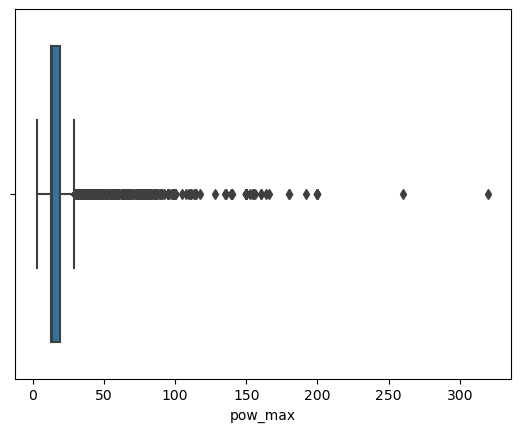

In [27]:
sns.boxplot(x=subscription["pow_max"])

price data

In [28]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


<Axes: xlabel='price_mid_peak_fix'>

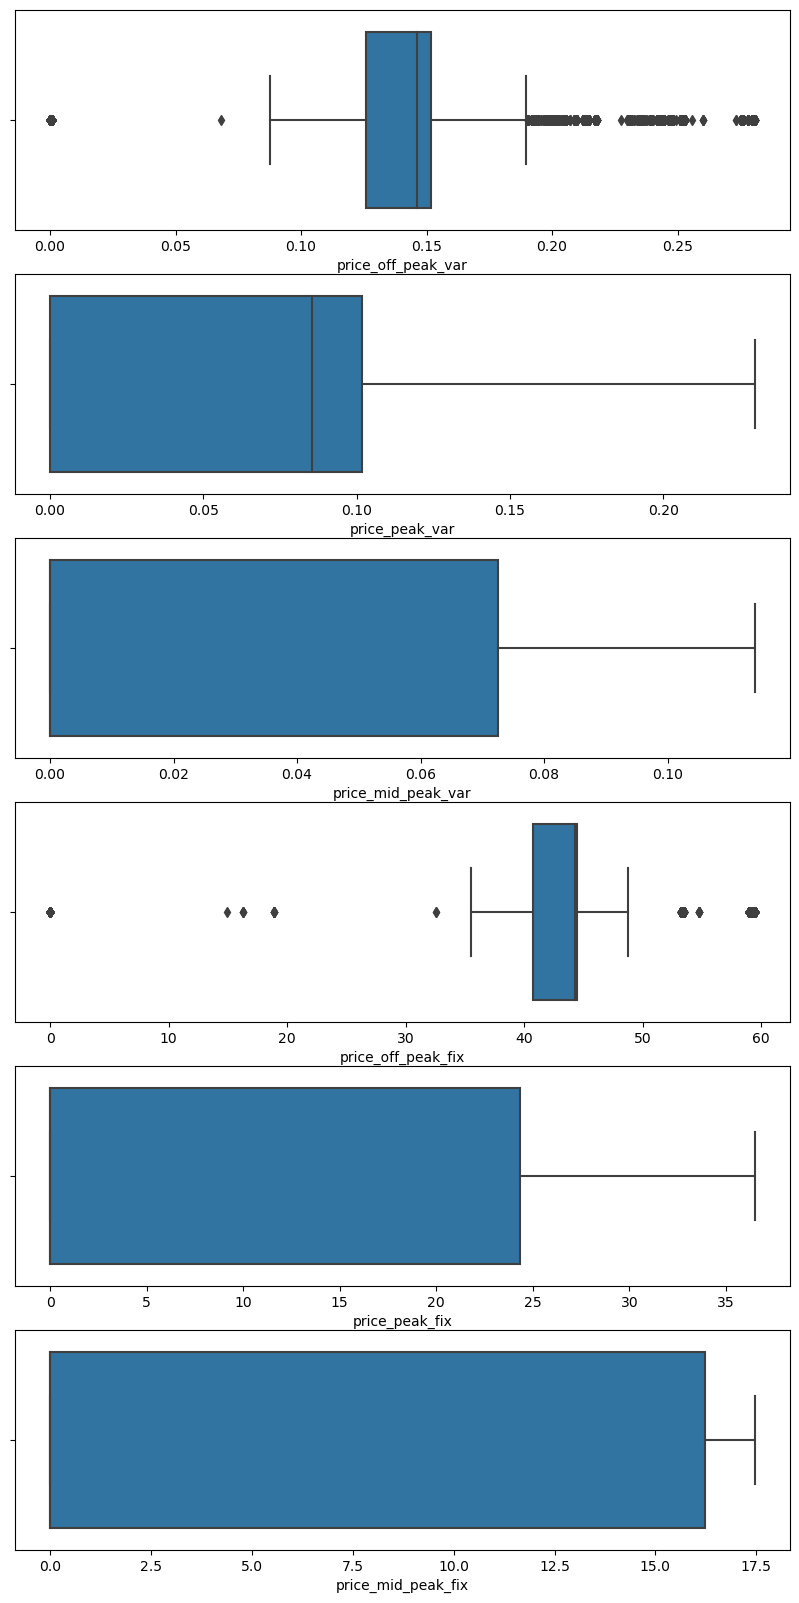

In [29]:
fig,axes=plt.subplots(6,1,figsize=(10,20))

sns.boxplot(x="price_off_peak_var",data=price_df,ax=axes[0])
sns.boxplot(x="price_peak_var",data=price_df,ax=axes[1])
sns.boxplot(x="price_mid_peak_var",data=price_df,ax=axes[2])
sns.boxplot(x="price_off_peak_fix",data=price_df,ax=axes[3])
sns.boxplot(x="price_peak_fix",data=price_df,ax=axes[4])
sns.boxplot(x="price_mid_peak_fix",data=price_df,ax=axes[5])

In [30]:
client_df["id"].nunique()

# there are 14606 unique ids and total entries are 193002,,so around 12 costumers are in 1 group

14606

In [31]:
mean_year = price_df.groupby(['id']).mean().reset_index()
mean_year.shape

C:\Users\HP\AppData\Local\Temp\ipykernel_2784\3377952084.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_year = price_df.groupby(['id']).mean().reset_index()


(16096, 7)

In [32]:
price_df.groupby(['id']).head(1)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000
12,31f2ce549924679a3cbb2d128ae9ea43,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
24,36b6352b4656216bfdb96f01e9a94b4e,2015-01-01,0.123086,0.100505,0.068646,40.565969,24.339581,16.226389
36,48f3e6e86f7a8656b2c6b6ce2763055e,2015-01-01,0.144431,0.000000,0.000000,44.266931,0.000000,0.000000
48,cce88c7d721430d8bd31f71ae686c91e,2015-01-01,0.153159,0.130578,0.098720,41.063970,24.837581,16.724389
...,...,...,...,...,...,...,...,...
192942,cd622263c26436d1237e94ff05cdd506,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000
192954,ed3434c3c1e2056d1a313e2671815e4d,2015-01-01,0.128069,0.105843,0.073773,40.728885,24.437330,16.291555
192966,d00da2c0c568614b9937791f681cd7d7,2015-01-01,0.150211,0.000000,0.000000,44.266931,0.000000,0.000000
192978,045f94f0b7f538a8d8fae11080abb5da,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000


In [33]:
price_df.head(2)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0


In [34]:
price_df.shape

(193002, 8)

In [35]:
price_df["price_date"]=pd.to_datetime(price_df["price_date"],format="%Y-%m-%d")

In [36]:
mean_6m=price_df[price_df["price_date"]>"2015-07-01"].groupby(price_df["id"]).mean().reset_index()
mean_6m

C:\Users\HP\AppData\Local\Temp\ipykernel_2784\3412332748.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_6m=price_df[price_df["price_date"]>"2015-07-01"].groupby(price_df["id"]).mean().reset_index()


,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555
1,0004351ebdd665e6ee664792efc4fd13,0.143943,0.000000,0.000000,44.444710,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.201280,0.000000,0.000000,45.944710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.113068,0.095385,0.069409,40.728885,24.437330,16.291555
4,00114d74e963e47177db89bc70108537,0.145440,0.000000,0.000000,44.266930,0.000000,0.000000
...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.112488,0.094804,0.068829,40.728885,24.437330,16.291555
16092,fffac626da707b1b5ab11e8431a4d0a2,0.144773,0.000000,0.000000,44.373598,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,0.151399,0.126871,0.091394,41.228885,24.937330,16.791555
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.118667,0.100798,0.074083,40.663720,24.398229,16.265486


In [37]:

mean_6m.rename(columns={"price_peak_var":"price_peak_var_6m",
              "price_peak_fix":"price_peak_fix_6m",
              "price_mid_peak_var":"price_mid_peak_var_6m",
              "price_mid_peak_fix":"price_mid_peak_fix_6m",
              "price_off_peak_var":"price_off_peak_var_6m",
              "price_off_peak_fix":"price_off_peak_fix_6m"},inplace=True
              )


mean_6m["on_peak_6m"]=mean_6m["price_peak_var_6m"]+mean_6m["price_peak_fix_6m"]
mean_6m["mid_peak_6m"]=mean_6m["price_mid_peak_var_6m"]+mean_6m["price_mid_peak_fix_6m"]
mean_6m["off_peak_6m"]=mean_6m["price_off_peak_var_6m"]+mean_6m["price_off_peak_fix_6m"]

mean_6m.head(2)



,id,price_off_peak_var_6m,price_peak_var_6m,price_mid_peak_var_6m,price_off_peak_fix_6m,price_peak_fix_6m,price_mid_peak_fix_6m,on_peak_6m,mid_peak_6m,off_peak_6m
0,0002203ffbb812588b632b9e628cc38d,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,24.539003,16.365274,40.848791
1,0004351ebdd665e6ee664792efc4fd13,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,0.000000,0.000000,44.588653


In [38]:


mean_year.rename(columns={"price_peak_var":"price_peak_var_year",
              "price_peak_fix":"price_peak_fix_year",
              "price_mid_peak_var":"price_mid_peak_var_year",
              "price_mid_peak_fix":"price_mid_peak_fix_year",
              "price_off_peak_var":"price_off_peak_var_year",
              "price_off_peak_fix":"price_off_peak_fix_year"},inplace=True)

mean_year["on_peak_year"]=mean_year["price_peak_var_year"]+mean_year["price_peak_fix_year"]
mean_year["mid_peak_year"]=mean_year["price_mid_peak_var_year"]+mean_year["price_mid_peak_fix_year"]
mean_year["off_peak_year"]=mean_year["price_off_peak_var_year"]+mean_year["price_off_peak_fix_year"]


mean_year.head(2)


,id,price_off_peak_var_year,price_peak_var_year,price_mid_peak_var_year,price_off_peak_fix_year,price_peak_fix_year,price_mid_peak_fix_year,on_peak_year,mid_peak_year,off_peak_year
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.07316,40.701732,24.421038,16.280694,24.524832,16.353854,40.826071
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.00000,44.385450,0.000000,0.000000,0.000000,0.000000,44.531877


In [39]:
mean_prices=pd.merge(mean_6m,mean_year,on="id")
price_analysis=pd.merge(mean_prices,client_df[["id","churn"]],on="id")

In [40]:
price_analysis

,id,price_off_peak_var_6m,price_peak_var_6m,price_mid_peak_var_6m,price_off_peak_fix_6m,price_peak_fix_6m,price_mid_peak_fix_6m,on_peak_6m,mid_peak_6m,off_peak_6m,price_off_peak_var_year,price_peak_var_year,price_mid_peak_var_year,price_off_peak_fix_year,price_peak_fix_year,price_mid_peak_fix_year,on_peak_year,mid_peak_year,off_peak_year,churn
0,0002203ffbb812588b632b9e628cc38d,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,24.539003,16.365274,40.848791,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,24.524832,16.353854,40.826071,0
1,0004351ebdd665e6ee664792efc4fd13,0.143943,0.000000,0.000000,44.444710,0.000000,0.000000,0.000000,0.000000,44.588653,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,0.000000,0.000000,44.531877,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.201280,0.000000,0.000000,45.944710,0.000000,0.000000,0.000000,0.000000,46.145990,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,0.000000,0.000000,45.501268,0
3,00114d74e963e47177db89bc70108537,0.145440,0.000000,0.000000,44.266930,0.000000,0.000000,0.000000,0.000000,44.412370,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,0.000000,0.000000,44.414856,0
4,0013f326a839a2f6ad87a1859952d227,0.121647,0.103413,0.075460,40.728885,24.437330,16.291555,24.540743,16.367015,40.850532,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,24.542872,16.366476,40.854961,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,ffebf6a979dd0b17a41076df1057e733,0.116849,0.099718,0.072041,40.663720,24.398229,16.265486,24.497947,16.337527,40.780569,0.122426,0.102375,0.072210,40.606699,24.364017,16.242678,24.466392,16.314889,40.729125,0
14602,fffac626da707b1b5ab11e8431a4d0a2,0.144773,0.000000,0.000000,44.373598,0.000000,0.000000,0.000000,0.000000,44.518371,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000,0.000000,0.000000,44.458512,0
14603,fffc0cacd305dd51f316424bbb08d1bd,0.151399,0.126871,0.091394,41.228885,24.937330,16.791555,25.064201,16.882949,41.380284,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569,25.025265,16.858411,41.314049,0
14604,fffe4f5646aa39c7f97f95ae2679ce64,0.118667,0.100798,0.074083,40.663720,24.398229,16.265486,24.499027,16.339569,40.782387,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678,24.467516,16.316414,40.730558,0


C:\Users\HP\AppData\Local\Temp\ipykernel_2784\3150734703.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=price_analysis.corr(),annot=True,cmap="coolwarm")


<Axes: >

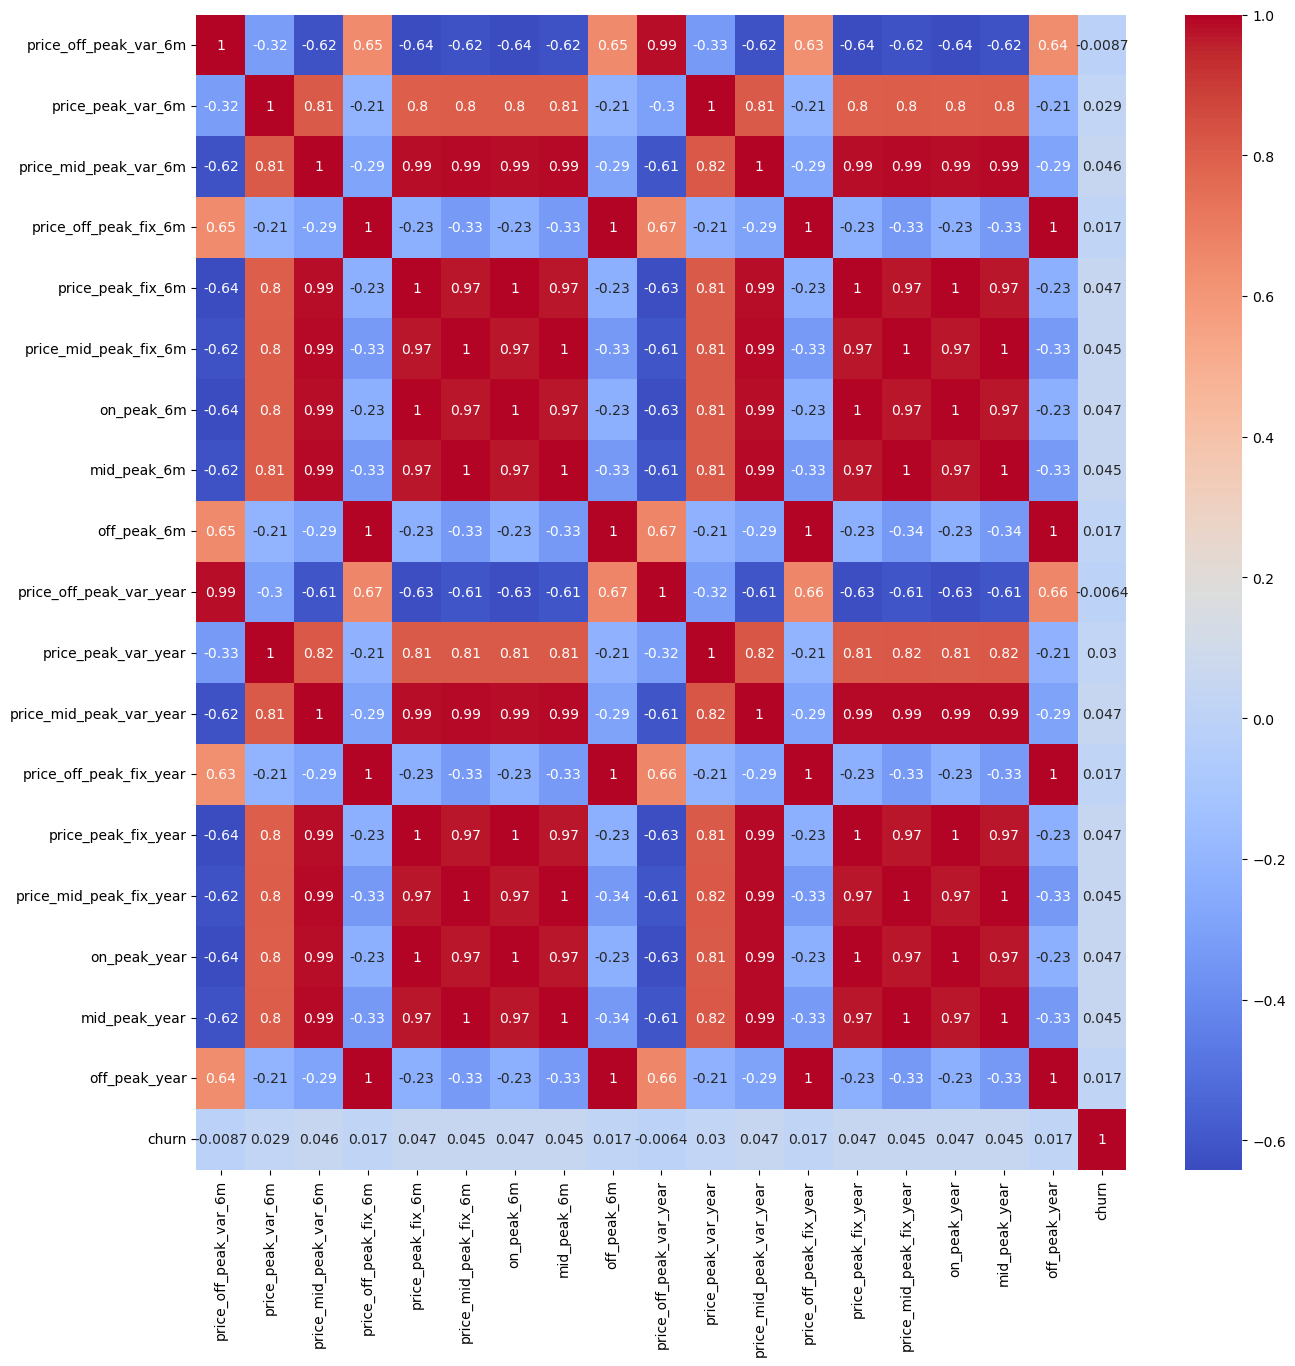

In [41]:
plt.figure(figsize=(15,15))
sns.heatmap(data=price_analysis.corr(),annot=True,cmap="coolwarm")



In [42]:
powerco_data=pd.merge(client_df.drop(columns=["churn"]),price_analysis,on="id")

In [43]:
powerco_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,price_off_peak_var_year,price_peak_var_year,price_mid_peak_var_year,price_off_peak_fix_year,price_peak_fix_year,price_mid_peak_fix_year,on_peak_year,mid_peak_year,off_peak_year,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,22.452760,14.967871,41.067053,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,0.007124,0.000000,44.460984,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,0.088421,0.000000,44.555962,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,0.000000,0.000000,44.551475,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263,24.516531,16.348129,40.812330,0


In [48]:
powerco_data.to_csv("D:\DS\powerco_data.csv",index=False)

#here is our final data